# Netflix Stock Predictions

Data from yahoo.com/finance Netflix historical price 12/16/2015 ~ 12/16/2019 daily price and volume. There are 7 columns; Date, open, high, low, close, volume, adj close (2001, 7) each of stock

In this project, we tried to predict the stock price in future. We used two Regression models - Decision Tree Regressor model & Linear Regression model.At the end of the project, we will show the results with visualization.

In [1]:
# import all the useful libraries

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [26]:
#Load dataset with read_csv
df = pd.read_csv("NFLX.csv")

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [28]:
df.shape

(1007, 7)

In [29]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(1007, 7)

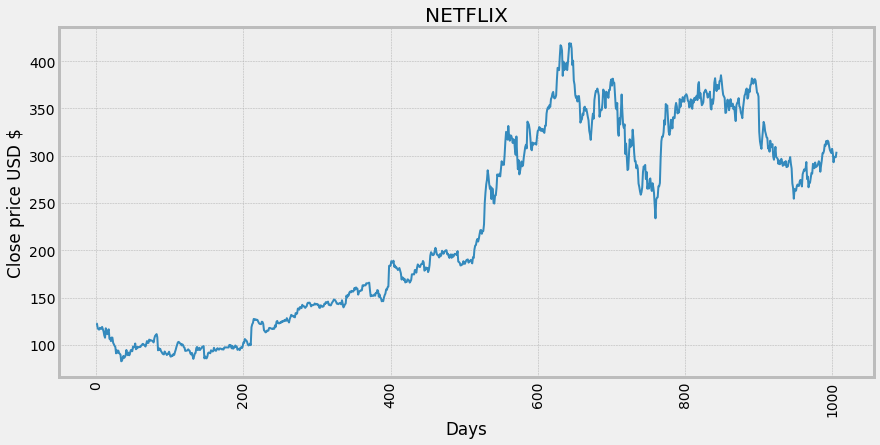

In [32]:
# Visualize the closing price data
plt.rcParams["figure.figsize"] = (13,6)
plt.style.use("bmh")


plt.plot(df["Close"])

plt.title("NETFLIX")
plt.xlabel("Days")
plt.ylabel("Close price USD $")
plt.xticks(rotation=90)
plt.show()

In [34]:
df[["Close"]].head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [35]:
# create a variable to predict future out in days

future_days = 26

# create a new (target) column x unit/days up
df["prediction"] = df[["Close"]].shift(-future_days)

df["prediction"].head()

0    97.830002
1    91.150002
2    94.410004
3    91.839996
4    94.089996
Name: prediction, dtype: float64

In [37]:
#convert date String into Integer
df['Date'].head()[0]

df['Date'] = df['Date'].str.replace('-','').astype(int)

df['Date'].head()[0]

20151216

In [38]:
# convert as an array and remove x rows/days

x = np.array(df.drop(["prediction"], axis=1))[:-future_days]
print(x)

[[2.01512160e+07 1.19800003e+02 1.23000000e+02 ... 1.22639999e+02
  1.22639999e+02 1.31810000e+07]
 [2.01512170e+07 1.23970001e+02 1.26349998e+02 ... 1.22510002e+02
  1.22510002e+02 1.72849000e+07]
 [2.01512180e+07 1.20849998e+02 1.22190002e+02 ... 1.18019997e+02
  1.18019997e+02 1.79481000e+07]
 ...
 [2.01911050e+07 2.89989990e+02 2.91190002e+02 ... 2.88029999e+02
  2.88029999e+02 4.06240000e+06]
 [2.01911060e+07 2.88190002e+02 2.90559998e+02 ... 2.88589996e+02
  2.88589996e+02 3.43830000e+06]
 [2.01911070e+07 2.90700012e+02 2.98190002e+02 ... 2.89570007e+02
  2.89570007e+02 5.92850000e+06]]


In [39]:
# create the target data (y) and convert as an array and get target values
y = np.array(df["prediction"])[:-future_days]
print(y)


[ 97.830002  91.150002  94.410004  91.839996  94.089996  91.489998
  90.739998  89.709999  82.790001  83.32      86.129997  88.449997
  86.349998  87.400002  89.050003  94.760002  90.489998  89.230003
  91.93      89.120003  91.610001  94.529999  94.790001  93.410004
  98.300003  97.610001  97.93     101.580002  95.489998  96.230003
  98.        97.360001  97.660004  98.129997  97.860001  99.349998
  99.720001 101.120003 101.059998  99.839996  99.589996  98.360001
 101.209999 104.129997 102.190002 102.230003 105.699997 104.349998
 104.940002 104.830002 104.449997 103.809998 102.68     106.980003
 109.650002 110.419998 111.510002 108.400002  94.339996  96.769997
  94.980003  95.900002  93.559998  92.43      91.040001  90.279999
  90.029999  93.110001  91.540001  90.790001  89.370003  90.839996
  90.540001  92.889999  90.019997  87.739998  87.879997  89.120003
  88.629997  90.5       89.550003  92.489998  94.889999  97.889999
 100.199997 102.809998 103.300003 102.57     101.510002 101.25

In [40]:
# now can split the data into train & test

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=0) 

In [47]:
# create the model
dtr = DecisionTreeRegressor()
tree = dtr.fit(x_train,y_train)

# now linear regression model
lr = LinearRegression()
lin = lr.fit(x_train,y_train)

In [48]:
# get the last x rows of feature dataset
x_future = df.drop(["prediction"],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2.01910030e+07, 2.67779999e+02, 2.68839996e+02, 2.57010010e+02,
        2.68149994e+02, 2.68149994e+02, 8.95100000e+06],
       [2.01910040e+07, 2.68200012e+02, 2.75480011e+02, 2.66470001e+02,
        2.72790009e+02, 2.72790009e+02, 9.89040000e+06],
       [2.01910070e+07, 2.71989990e+02, 2.76679993e+02, 2.71279999e+02,
        2.74459991e+02, 2.74459991e+02, 6.52560000e+06],
       [2.01910080e+07, 2.73029999e+02, 2.75529999e+02, 2.70640015e+02,
        2.70720001e+02, 2.70720001e+02, 6.27640000e+06],
       [2.01910090e+07, 2.70019989e+02, 2.71000000e+02, 2.64570007e+02,
        2.67529999e+02, 2.67529999e+02, 6.79440000e+06],
       [2.01910100e+07, 2.65970001e+02, 2.80529999e+02, 2.65029999e+02,
        2.80480011e+02, 2.80480011e+02, 1.08091000e+07],
       [2.01910110e+07, 2.84799988e+02, 2.87869995e+02, 2.82339996e+02,
        2.82929993e+02, 2.82929993e+02, 8.78610000e+06],
       [2.01910140e+07, 2.83929993e+02, 2.86929993e+02, 2.82000000e+02,
        2.85529999e+02, 2

In [51]:
# tree prediction

tree_pred = tree.predict(x_future)
print(tree_pred)

[291.570007 282.929993 292.01001  283.109985 289.619995 295.029999
 302.570007 302.600006 302.600006 311.690002 310.480011 315.549988
 315.549988 315.929993 295.029999 306.160004 306.160004 304.320007
 302.570007 302.600006 302.5      293.119995 304.209991 298.5
 298.5      304.209991]


In [52]:
# linear model prediction
lin_pred = lin.predict(x_future)
print(lin_pred)

[291.66566055 297.44637265 296.75812849 292.7061527  289.65094124
 311.31461315 301.0797243  304.14542094 302.11107791 300.84936536
 301.68397676 294.07910747 300.57974265 290.93453733 296.05830195
 293.87858785 302.54200711 306.78967238 302.86558721 313.99232347
 305.62448054 304.29109604 315.07963495 306.13508989 307.47579039
 314.53210227]


<ipython-input-68-728f412a515f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


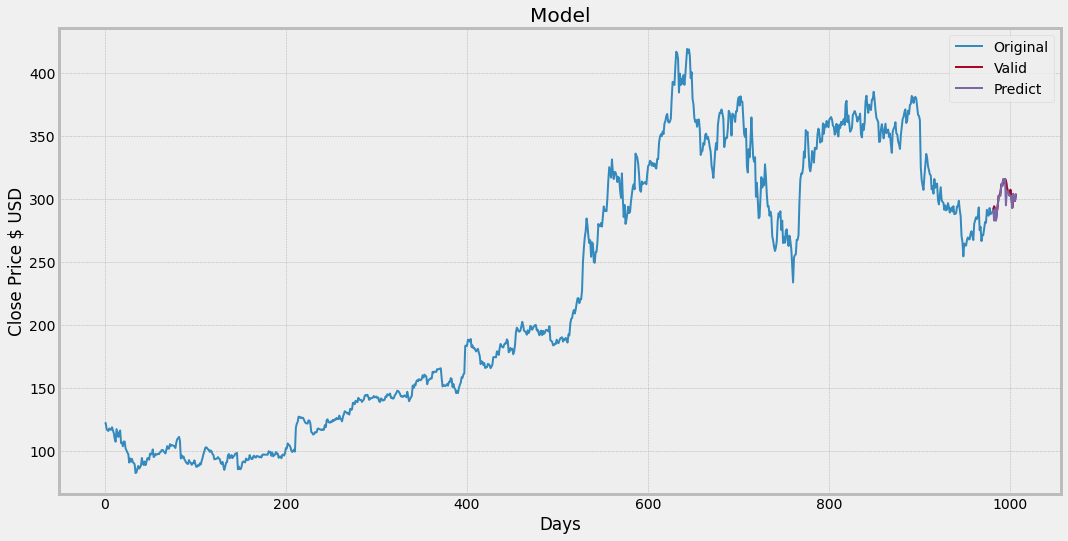

In [68]:
# visualization

predictions = tree_pred

valid = df[x.shape[0]:]

valid["predictions"] = predictions

plt.rcParams["figure.figsize"] = (16,8)
plt.style.use("bmh")

plt.plot(df["Close"])
plt.plot(valid[["Close","predictions"]])

plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price $ USD")
plt.legend(["Original","Valid","Predict"])
plt.show()

<ipython-input-69-f228609dee34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"] = predictions


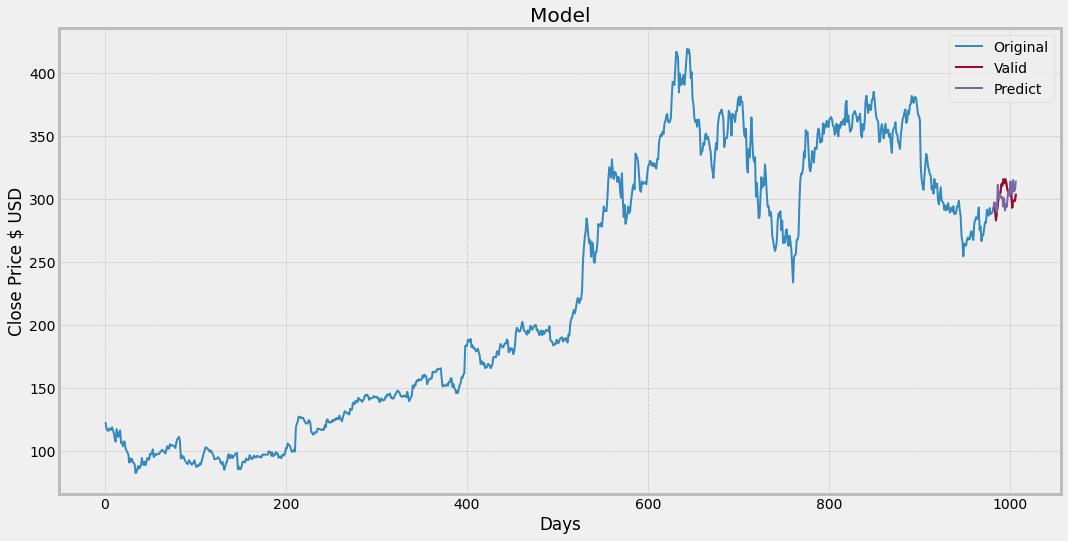

In [69]:
# visualization

predictions = lin_pred

valid = df[x.shape[0]:]

valid["predictions"] = predictions

plt.rcParams["figure.figsize"] = (16,8)
plt.style.use("bmh")

plt.plot(df["Close"])
plt.plot(valid[["Close","predictions"]])

plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price $ USD")
plt.legend(["Original","Valid","Predict"])
plt.show()